In [274]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

simultaneous game (two-player strategic form game)  
同時手番ゲーム(戦略型二人ゲーム)

In [275]:
a_tactics = 3
b_tactics = 4
r = np.random.randint(0, 15, (b_tactics, a_tactics, 2))

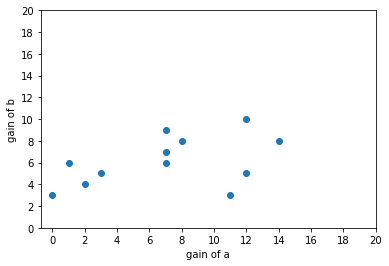

In [276]:
plt.scatter(r[:, :, 0], r[:, :, 1])
plt.xlabel("gain of a")
plt.ylabel("gain of b")
plt.xticks(range(0,21,2))
plt.yticks(range(0,21,2))
plt.show()

ナッシュ均衡

In [277]:
nash_equilibrium = []
b_tactic = np.argmax(r, axis=0)[:, 0] #Aの戦略を固定してBの利益最大を見つける
a_tactic = np.argmax(r, axis=1)[:, 1] #Bの戦略を固定してAの利益最大を見つける
b_tactic, a_tactic

for idx1,x in enumerate(b_tactic):
    for idx2,y in enumerate(a_tactic):
        #[b_tactis, idx]と[idx, a_tactis]が一致すればそれはナッシュ均衡
        if ([x, idx1] == [idx2, y]):
            nash_equilibrium.append([x, idx1])
nash_equilibrium

[[0, 0], [3, 2]]

パレート最適

In [278]:
pareto_optimal = []
b_tactics, a_tactics, _ = r.shape
for i in range(b_tactics):
    for j in range(a_tactics):
        #右上にある点がなければパレート最適
        check = r<r[i,j]
        if np.count_nonzero(check.sum(axis=2)) == b_tactics*a_tactics-1:
            pareto_optimal.append([i,j])
pareto_optimal

[[2, 2], [3, 2]]

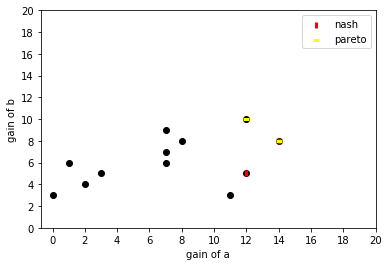

In [279]:
plt.scatter(r[:, :, 0], r[:, :, 1], color="black")
plt.scatter([r[l[0], l[1], 0] for l in nash_equilibrium], [r[l[0], l[1], 1] for l in nash_equilibrium], label="nash", marker="|", color="red", linewidth =3)
plt.scatter([r[l[0], l[1], 0] for l in pareto_optimal], [r[l[0], l[1], 1] for l in pareto_optimal], label="pareto", marker="_", color="yellow", linewidth =3)
plt.xlabel("gain of a")
plt.ylabel("gain of b")
plt.xticks(range(0,21,2))
plt.yticks(range(0,21,2))
plt.legend()
plt.show()